# **Problem Statement**
**bold text**
# The aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data

Attribute Information:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84


In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

import seaborn as sns
sns.set()
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# load dataset
dataframe = pandas.read_csv(r"")


In [ ]:
dataframe.head(4)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0


In [ ]:
dataframe.shape

(517, 13)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
# Encode Data(data preprocessing)
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [ ]:
print("Statistical Description:", dataframe.describe())

Statistical Description:                 X           Y       month  ...        wind        rain         area
count  517.000000  517.000000  517.000000  ...  517.000000  517.000000   517.000000
mean     4.669246    4.299807    7.475822  ...    4.017602    0.021663    12.847292
std      2.313778    1.229900    2.275990  ...    1.791653    0.295959    63.655818
min      1.000000    2.000000    1.000000  ...    0.400000    0.000000     0.000000
25%      3.000000    4.000000    7.000000  ...    2.700000    0.000000     0.000000
50%      4.000000    4.000000    8.000000  ...    4.000000    0.000000     0.520000
75%      7.000000    5.000000    9.000000  ...    4.900000    0.000000     6.570000
max      9.000000    9.000000   12.000000  ...    9.400000    6.400000  1090.840000

[8 rows x 13 columns]


### **cleaning**

In [ ]:
#checking any duplicate values
dataframe.duplicated().any()

True

In [ ]:
dataframe.drop_duplicates(inplace= True)

In [ ]:
print("Shape:", dataframe.shape)


Shape: (513, 13)


In [ ]:
#missing values
dataframe.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

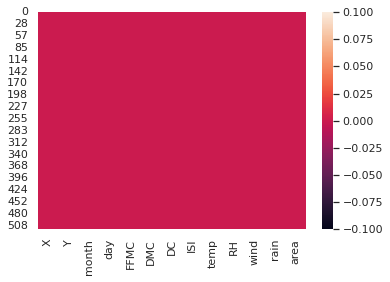

In [ ]:
sns.heatmap(dataframe.isnull())

In [ ]:
print("Correlation:", dataframe.corr(method='pearson'))

Correlation:               X         Y     month  ...      wind      rain      area
X      1.000000  0.542705 -0.066942  ...  0.020869  0.065176  0.062930
Y      0.542705  1.000000 -0.065383  ... -0.019537  0.033313  0.045168
month -0.066942 -0.065383  1.000000  ... -0.085160  0.013187  0.057623
day   -0.022520 -0.006672 -0.047832  ...  0.030199 -0.048206  0.023315
FFMC  -0.020499 -0.045979  0.293428  ... -0.029208  0.056806  0.040232
DMC   -0.048861  0.008210  0.464361  ... -0.105111  0.074780  0.073783
DC    -0.088801 -0.098496  0.867865  ... -0.203010  0.035690  0.050313
ISI    0.006033 -0.023142  0.185696  ...  0.106825  0.067664  0.008411
temp  -0.051070 -0.023871  0.369134  ... -0.227618  0.069526  0.098222
RH     0.083757  0.062587 -0.100175  ...  0.071433  0.099616 -0.075460
wind   0.020869 -0.019537 -0.085160  ...  1.000000  0.061479  0.012699
rain   0.065176  0.033313  0.013187  ...  0.061479  1.000000 -0.007418
area   0.062930  0.045168  0.057623  ...  0.012699 -0.007418  1.

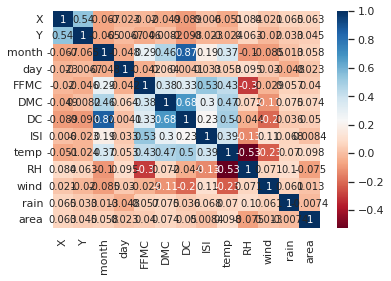

In [ ]:
sns.heatmap(dataframe.corr(), annot=True, cmap="RdBu")
plt.show()

'temp' has the highest correlation with the area of forest fire(which is a positive correlation), followed by 'RH' also a positive correlation, 'Rain' has the least correlation

(array([504.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

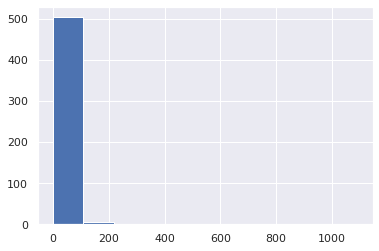

In [ ]:
plt.hist((dataframe.area))

Most of the dataset's samples fall between 0 and 200 of 'Area' output class, with majority being less than 100

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b47bebf50>,
      dtype=object)

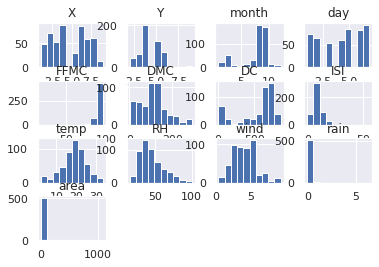

In [ ]:
dataframe.hist()

'Temp' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

X            AxesSubplot(0.125,0.71587;0.168478x0.16413)
Y         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
month     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
day       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
FFMC        AxesSubplot(0.125,0.518913;0.168478x0.16413)
DMC      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
DC       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
ISI      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
temp        AxesSubplot(0.125,0.321957;0.168478x0.16413)
RH       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
wind     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
rain     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
area           AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

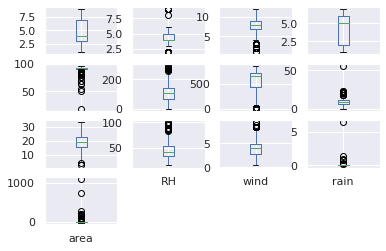

In [ ]:
dataframe.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

Outliers present in

Y,month,FFMC,DMC, DC, ISI,temp,RH,wind,rain,area 

In [ ]:
dataset = dataframe.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [ ]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.024126 (19.381514)
Ridge: 0.024125 (19.379367)
Lasso: 0.023442 (19.121899)
ElasticNet: 0.023328 (19.123236)
RandomForest: 0.824816 (7.971561)
SVM: 0.000548 (12.848921)


# RandomForest is the best estimators/models for this dataset.